In [ ]:
# https://www.analyticsvidhya.com/blog/2021/05/training-state-of-the-art-deep-learning-models-with-fast-ai/

# https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson7-resnet-mnist.ipynb

!pip install fastai --upgrade

import torch
import fastai
from fastai.vision.all import *
print(fastai.__version__)

2.5.2


[Path('/root/.fastai/data/mnist_png/testing'), Path('/root/.fastai/data/mnist_png/training')]


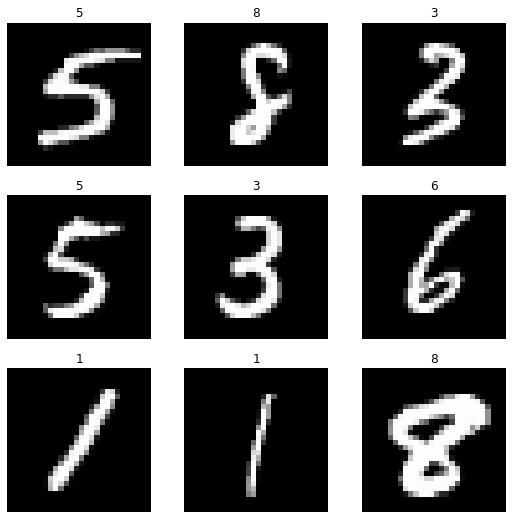

In [ ]:
#prepare data
path = untar_data(URLs.MNIST)
dls = ImageDataLoaders.from_folder(path=path, 
                                   train='training', 
                                   valid='testing', 
                                   shuffle=True)
print(path.ls())
dls.train.show_batch()  

In [ ]:
#fine tune model
learn = cnn_learner(dls, 
                    resnet18, 
                    metrics=[accuracy, error_rate])
learn.fine_tune(3)


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.710590,0.456113,0.850200,0.149800,01:53


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.116789,0.065843,0.979000,0.021000,02:02
1,0.060662,0.037500,0.988200,0.011800,02:03
2,0.029006,0.030925,0.990700,0.009300,02:03


In [ ]:
#predict
images = get_image_files(path/'testing')
img = PILImage.create(images[4432])
label, tensor, probs = learn.predict(img)

display(img)
label, tensor, probs

('0',
 tensor(0),
 tensor([9.9999e-01, 1.3952e-06, 1.1349e-06, 8.0708e-07, 1.0951e-07, 8.6554e-07,
         4.3913e-06, 1.6345e-06, 9.2512e-07, 1.2998e-06]))

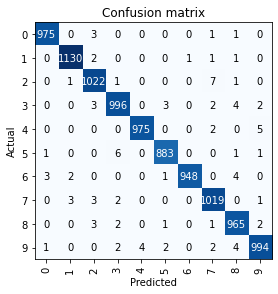

In [ ]:
#classification confusion matrix
interep = ClassificationInterpretation.from_learner(learn)
interep.plot_confusion_matrix()

Sequential (Input shape: 64)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 8 x 14 x 14    
Conv2d                                    224        True      
BatchNorm2d                               16         True      
ReLU                                                           
____________________________________________________________________________
                     64 x 16 x 7 x 7     
Conv2d                                    1168       True      
BatchNorm2d                               32         True      
ReLU                                                           
____________________________________________________________________________
                     64 x 32 x 4 x 4     
Conv2d                                    4640       True      
BatchNorm2d                               64         True      
ReLU                                                           
___________________________________________________

epoch,train_loss,valid_loss,accuracy,time
0,0.100379,0.065739,0.985100,01:32


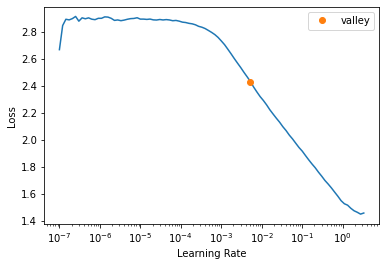

In [ ]:
# custom model

def conv(ni,nf): return nn.Conv2d(ni, nf, kernel_size=3, stride=2, padding=1)

model = nn.Sequential(
    conv(3, 8), # 14
    nn.BatchNorm2d(8),
    nn.ReLU(),
    conv(8, 16), # 7
    nn.BatchNorm2d(16),
    nn.ReLU(),
    conv(16, 32), # 4
    nn.BatchNorm2d(32),
    nn.ReLU(),
    conv(32, 16), # 2
    nn.BatchNorm2d(16),
    nn.ReLU(),
    conv(16, 10), # 1
    nn.BatchNorm2d(10),
    Flatten()     # remove (1,1) grid
)

learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), metrics=accuracy)
print(learn.summary())


lr=learn.lr_find()
learn.fit_one_cycle(1, lr_max=lr)

In [ ]:

label, tensor, probs = learn.predict(img)
display(img)
label, tensor, probs

('0',
 TensorBase(0),
 TensorBase([9.9133e-01, 1.0621e-03, 8.2921e-04, 4.7828e-04, 1.2827e-03, 8.3645e-04,
         2.5803e-03, 6.6097e-04, 5.5475e-04, 3.8270e-04]))